# Laboratório 2

1. Use numpy para criar uma matriz (dataset) composta por valores numéricos aleatórios com 200
linhas (instâncias) e 12 colunas (características). Apresente o dataset.

In [37]:
import numpy as np
import pandas as pd

#matrix = np.random.randint(low = 2000).reshape(200, 12)
matrix = np.random.randint(low = 0, high = 199, size = 2400).reshape(200, 12)

matrix

array([[ 61, 191, 192, ..., 153,  68,  64],
       [140, 188,  87, ...,  46, 105, 195],
       [ 28, 184,  43, ..., 148,  44, 104],
       ...,
       [192,  15, 103, ..., 152,  76,  85],
       [ 53,   1,  98, ..., 119, 195, 146],
       [172,  16,  16, ..., 101, 112, 193]])

2. Converta o dataset do exercício 1 em um dataframe de pandas. As instâncias devem ser
numeradas de 0 a 199 e as características nomeadas com letras de "a" a "l" (inclua "k" como
coluna). Apresente o dataset no formato dataframe.

In [38]:
df = pd.DataFrame(data = matrix, columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l'])
df

,a,b,c,d,e,f,g,h,i,j,k,l
0,61,191,192,4,92,172,167,89,7,153,68,64
1,140,188,87,173,78,18,123,168,35,46,105,195
2,28,184,43,98,18,114,167,40,114,148,44,104
3,72,77,68,68,117,88,191,131,16,145,37,186
4,109,148,38,132,103,120,135,57,1,122,190,169
...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,1,80,3,117,9,68,90,42,2,22,89
196,22,151,184,117,111,32,13,119,194,75,124,96
197,192,15,103,33,143,159,25,68,80,152,76,85
198,53,1,98,131,115,53,162,64,16,119,195,146


3. Mostre apenas as instâncias ímpares e as características "b", "e", "f" do dataset criado no exercício 2 ordenados crescentemente pelos valores da característica "f".

In [39]:
df_odd = df[['b', 'e', 'f']][1::2].sort_values(by = 'f')
df_odd

,b,e,f
183,148,133,0
109,57,42,0
65,122,5,2
83,197,3,2
85,67,3,2
...,...,...,...
69,44,104,188
27,155,98,189
45,93,32,191
117,20,135,192


4. Apresente a soma dos valores, os valores mínimos e máximos, a média e o desvio padrão de cada coluna do dataset do exercício 3. Apresente também o intervalo de confiança de cada característica.

In [40]:
from scipy import stats
from math import sqrt

dfStatistics = pd.DataFrame(index = df_odd.columns.array, columns=['sum', 'min', 'max', 'mean', 'std', 'trust_interval'])
# print(df_odd.describe())

dfStatistics['sum'] = df_odd[dfStatistics.index].sum()
dfStatistics['min'] = df_odd[dfStatistics.index].min()
dfStatistics['max'] = df_odd[dfStatistics.index].max()
dfStatistics['mean'] = df_odd[dfStatistics.index].mean()
dfStatistics['std'] = df_odd[dfStatistics.index].std()

trust = stats.norm.interval(0.95, loc=dfStatistics['mean'], scale=dfStatistics['std']/sqrt(len(dfStatistics['mean'])))
floor, ceil = trust
dfStatistics['trust_interval'] = [(a, b) for a, b in zip(floor, ceil)]

dfStatistics


,sum,min,max,mean,std,trust_interval
b,9787,1,197,97.87,61.783698,"(27.956448607546676, 167.78355139245332)"
e,8821,3,198,88.21,56.550022,"(24.218802230361966, 152.20119776963801)"
f,9526,0,195,95.26,62.432448,"(24.612333027385134, 165.9076669726149)"


5. Faça um histograma com 7 faixas equidistantes de valores para a característica sepal_width da
base iris.

(array([ 8., 16., 59., 30., 25.,  9.,  3.]),
 array([2.        , 2.34285714, 2.68571429, 3.02857143, 3.37142857,
        3.71428571, 4.05714286, 4.4       ]),
 <BarContainer object of 7 artists>)

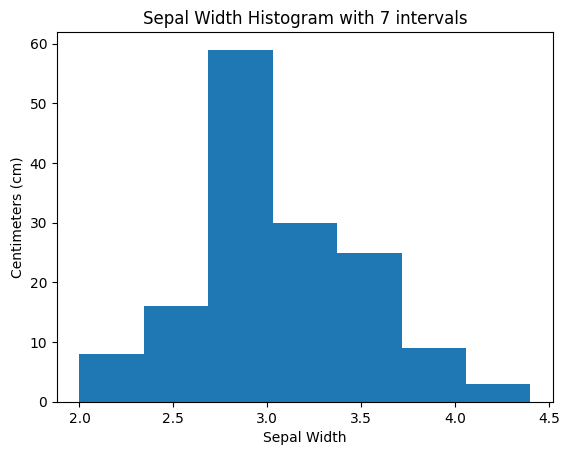

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")
iris

plt.xlabel("Sepal Width")
plt.ylabel("Centimeters (cm)")
plt.title("Sepal Width Histogram with 7 intervals")
plt.hist(iris['sepal_width'], 7)


6. Obtenha média, desvio padrão e intervalo de confiança de cada característica da base iris.
Contraste os resultados com os obtidos fazendo um gráfico de barras com intervalo de confiança.

In [42]:
iris
dfIrisStatistics = pd.DataFrame(index = iris.columns.array, columns=['mean', 'std', 'trust_interval'])
dfIrisStatistics.drop(['species'], inplace=True)

dfIrisStatistics['mean'] = iris[dfIrisStatistics.index].mean()
dfIrisStatistics['std'] = iris[dfIrisStatistics.index].std()

trustIris = stats.norm.interval(0.95, loc=dfIrisStatistics['mean'], scale=dfIrisStatistics['std']/sqrt(len(dfIrisStatistics['mean'])))
floorIris, ceilIris = trustIris
dfIrisStatistics['trust_interval'] = [(a, b) for a, b in zip(floorIris, ceilIris)]

dfIrisStatistics


,mean,std,trust_interval
sepal_length,5.843333,0.828066,"(5.03184343950626, 6.654823227160407)"
sepal_width,3.057333,0.435866,"(2.630192223057733, 3.4844744436089345)"
petal_length,3.758000,1.765298,"(2.0280395204196298, 5.487960479580371)"
petal_width,1.199333,0.762238,"(0.4523541439223119, 1.9463125227443552)"


<Axes: >

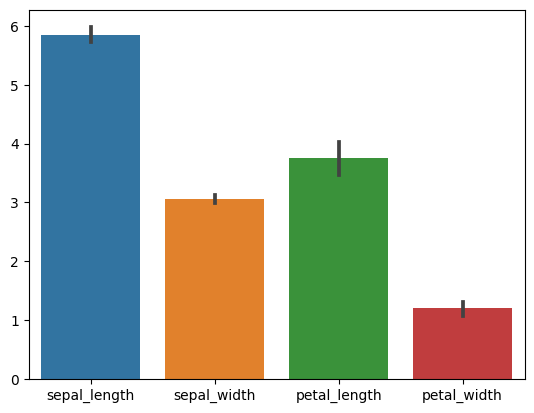

In [43]:
sns.barplot(data=iris)

7. Faça um gráfico de dispersão apresentando os dados das caraterísticas sepal_length e sepal_width
diferenciando os exemplos de cada classe.

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

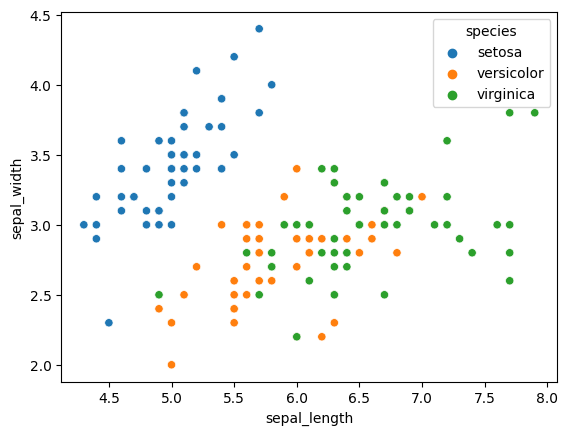

In [44]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=iris)

8. Faça um gráfico de caixas com dados de cada característica (coluna) do dataframe do exercício 2.

<Axes: >

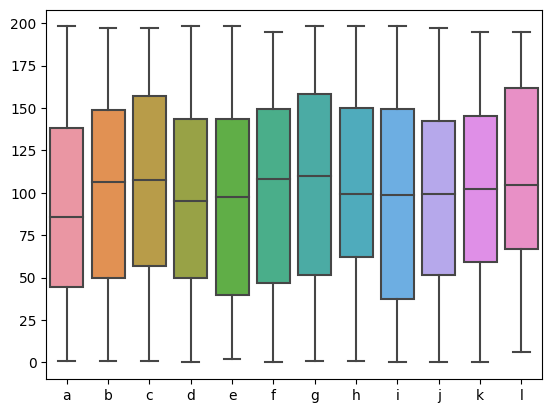

In [45]:
sns.boxplot(data=df)

9. Apresente um gráfico com a projeção TSNE criado no exercício 1

In [46]:
df_c = df.copy()
# Adicionando classes aleatoriamente para os dataframe do exercício 1.
df_c['class'] = np.random.randint(1, 5, df.shape[0])
df_c

,a,b,c,d,e,f,g,h,i,j,k,l,class
0,61,191,192,4,92,172,167,89,7,153,68,64,4
1,140,188,87,173,78,18,123,168,35,46,105,195,2
2,28,184,43,98,18,114,167,40,114,148,44,104,2
3,72,77,68,68,117,88,191,131,16,145,37,186,2
4,109,148,38,132,103,120,135,57,1,122,190,169,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,1,80,3,117,9,68,90,42,2,22,89,4
196,22,151,184,117,111,32,13,119,194,75,124,96,3
197,192,15,103,33,143,159,25,68,80,152,76,85,3
198,53,1,98,131,115,53,162,64,16,119,195,146,1


In [47]:
df_train = df_c.loc[:,'a':'l'] # Selecionando colunas para ser visualizadas.
df_train

,a,b,c,d,e,f,g,h,i,j,k,l
0,61,191,192,4,92,172,167,89,7,153,68,64
1,140,188,87,173,78,18,123,168,35,46,105,195
2,28,184,43,98,18,114,167,40,114,148,44,104
3,72,77,68,68,117,88,191,131,16,145,37,186
4,109,148,38,132,103,120,135,57,1,122,190,169
...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,1,80,3,117,9,68,90,42,2,22,89
196,22,151,184,117,111,32,13,119,194,75,124,96
197,192,15,103,33,143,159,25,68,80,152,76,85
198,53,1,98,131,115,53,162,64,16,119,195,146


<Axes: >

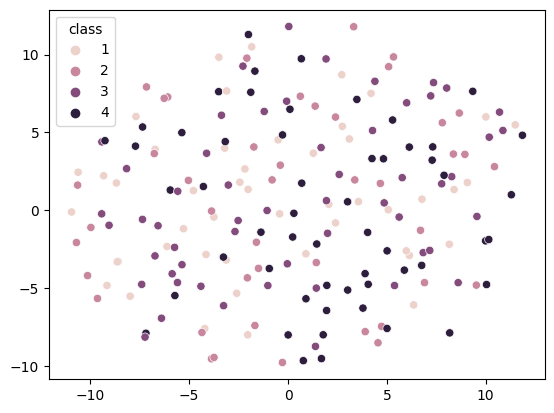

In [48]:
from sklearn.manifold import TSNE

tnse = TSNE()

view = tnse.fit_transform(df_train)
sns.scatterplot(x=view[:,0],y=view[:,1],hue=df_c['class'])